In [1]:
#import necessary libraries

from bs4 import BeautifulSoup
import requests
import os
import pandas as pd

In [2]:
#define the url to be scrapped for data

url = 'https://eoddata.com/stocklist/TSX/A.htm'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
#create lists to store the data

company_names = []
high_values = []
low_values = []
close_values = []
volumes = []
changes = []
changes2 = []

In [4]:
#find the tags and attributes for the company data

companies_data = soup.find_all('tr', class_ = ['re', 'ro'])

In [5]:
def stock_scraper(company_data):
  #this fetches the company name, high value, low value,
  #closing value, and volume of stocks

  name = company_data.find_all('td')[1].text
  company_names.append(name)

  high = company_data.find_all('td')[2].text
  high_values.append(high)

  low = company_data.find_all('td')[3].text
  low_values.append(low)

  close = company_data.find_all('td')[4].text
  close_values.append(close)

  volume = company_data.find_all('td')[5].text
  volumes.append(volume)

  change = company_data.find_all('td')[6].text
  changes.append(change)

  change2 = company_data.find_all('td')[8].text
  changes2.append(change2)



In [6]:
#loop over the companies and scrape the data using
#the function defined above

for company_data in companies_data:
  stock_scraper(company_data)

In [7]:
#create the dataframe

data = {
    'Company Name': company_names,
    'Highest Value': high_values,
    'Lowest Value': low_values,
    'Closing Value': close_values,
    'Volume of Stock': volumes,
    'Change (%)': changes,
    'Change': changes2
}

df = pd.DataFrame(data)

In [8]:
#save the file as a csv

df.to_csv('Toronto Stock Exchange Web Scrape')

# Exploratory Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df.head()

,Company Name,Highest Value,Lowest Value,Closing Value,Volume of Stock,Change (%),Change
0,Aberdeen International Inc,0.0450,0.0450,0.0450,"26,500",0.0000,0.00
1,Advantage Oil & Gas Ltd,7.630,7.240,7.320,"592,360",-0.270,3.56
2,ABC Technologies Holdings Inc,5.530,5.240,5.250,"4,200",0.000,0.00
3,Absolute Software Corp,15.18,15.03,15.18,"61,346",0.09,0.60
4,Accelerate Carbon Negative Bitcoin ETF,2.840,2.840,2.840,461,0.100,3.65


In [11]:
df = df.apply(lambda x: x.str.replace(',', ''))

In [12]:
df.iloc[:,1:6] = df.iloc[:,1:6].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company Name     117 non-null    object
 1   Highest Value    117 non-null    object
 2   Lowest Value     117 non-null    object
 3   Closing Value    117 non-null    object
 4   Volume of Stock  117 non-null    object
 5   Change (%)       117 non-null    object
 6   Change           117 non-null    object
dtypes: object(7)
memory usage: 6.5+ KB


In [14]:
top_10 = df.sort_values(by='Closing Value', ascending=False)[:10]

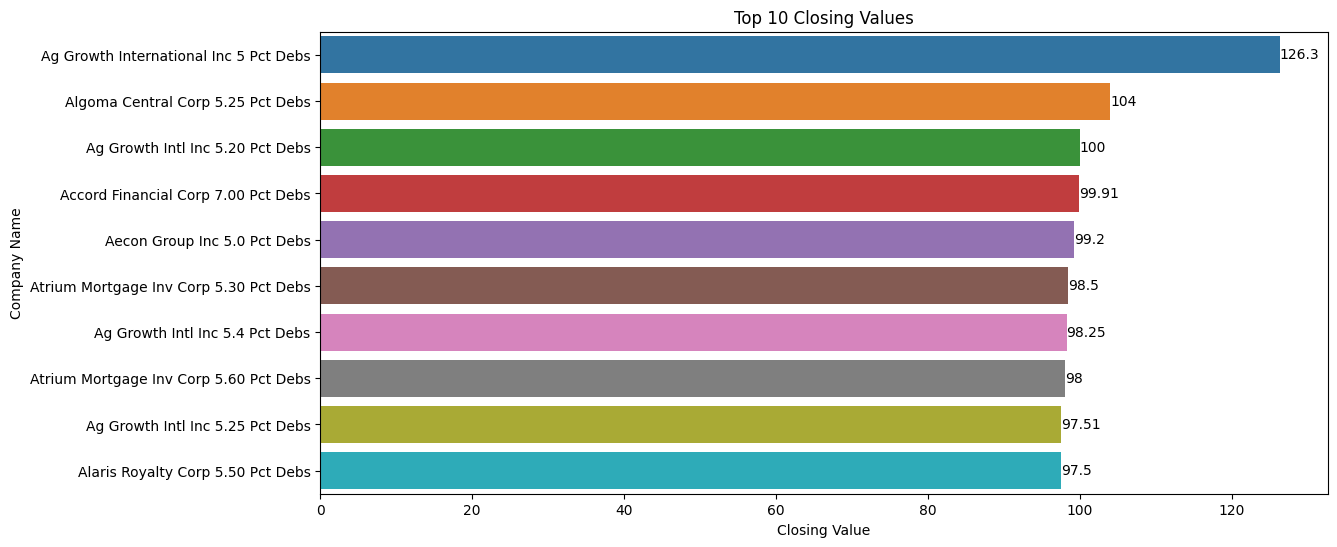

In [15]:
fig, axs = plt.subplots(figsize=(13,6))
sns.barplot(data=top_10, y='Company Name', x='Closing Value')
for bars in axs.containers:
  axs.bar_label(bars)
plt.title('Top 10 Closing Values')
plt.show()

In [16]:
top_10_change = df.sort_values(by='Change', ascending=False)[:10]

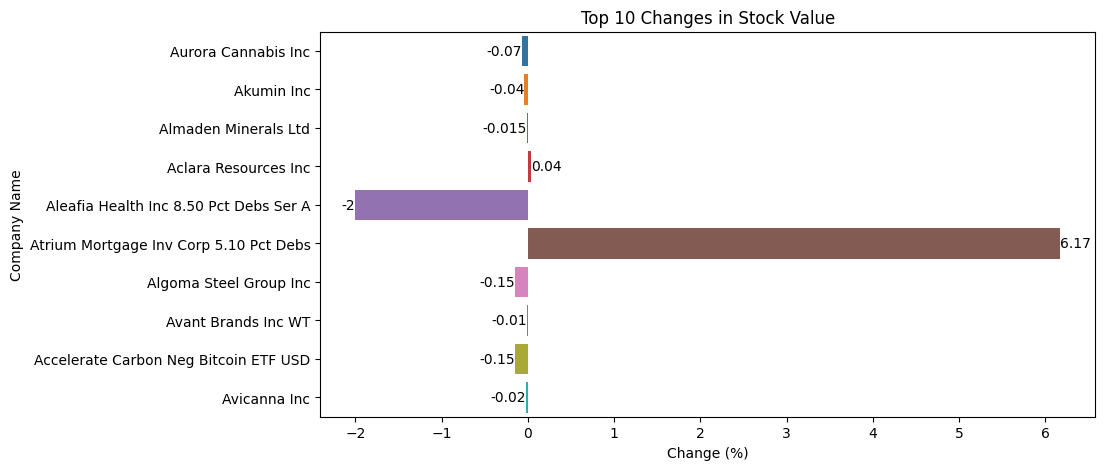

In [17]:
fig, axs = plt.subplots(figsize=(10,5))
sns.barplot(data=top_10_change, x='Change (%)', y='Company Name')
for bars in axs.containers:
  axs.bar_label(bars)
plt.title('Top 10 Changes in Stock Value')
plt.show()


In [18]:
top_10_volume = df.sort_values(by='Volume of Stock', ascending=False)[:10]

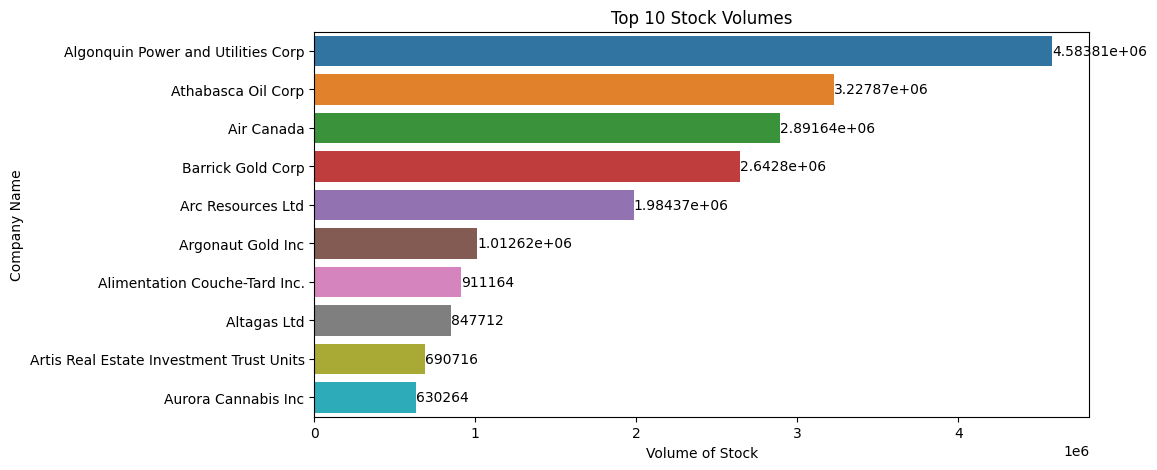

In [19]:
fig, axs = plt.subplots(figsize=(10,5))
sns.barplot(data=top_10_volume, x='Volume of Stock', y='Company Name')
for bars in axs.containers:
  axs.bar_label(bars)
plt.title('Top 10 Stock Volumes')
plt.show()